In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Database into variable 'df'
df = pd.read_csv('voice.csv')

In [3]:
#Let's look at columns of the dataset
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#The dataset is consistent throughout and the only variable which is categorical is 'Label' which we have to predict
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
#The dataset doesn't have any non 'NaN' values 
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


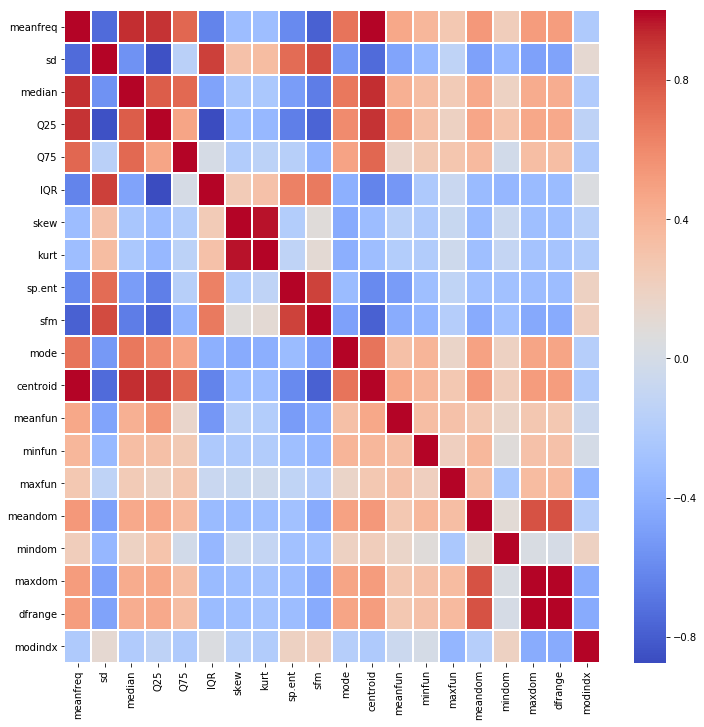

In [6]:
#Let's take a look on the heatmap because why not
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidth=1,cmap='coolwarm')

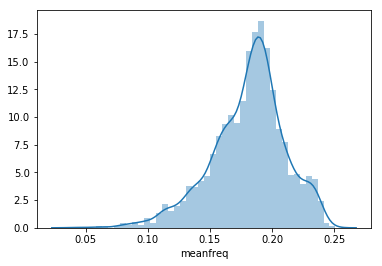

In [7]:
#The mean frequency looks to be normally distributed as expected from a data like 'voice'.
sns.distplot(df['meanfreq'])

In [8]:
#Splitting the independent and dependent columns
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

(array([1584.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1584.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

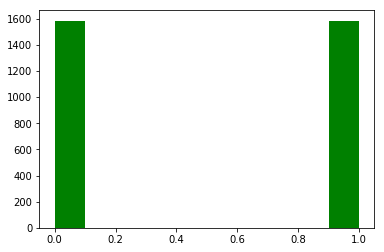

In [9]:
#As the 'labels' column consists of string, we need to convert into binary labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#To be sure of labels, let's plot a histogram
plt.hist(y,color='green')

In [10]:
#The values need to be normalized so using StandardScaler
from sklearn.preprocessing import StandardScaler
standard_sc = StandardScaler()
X = standard_sc.fit_transform(X)

In [11]:
#Splitting of training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
#Trying model performance using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
print("Performance on training set: ",  str(lr_classifier.score(X_train,y_train)))
print("Performance on test set", str(lr_classifier.score(X_test,y_test)))
y_pred_lr = lr_classifier.predict(X_train)
y_pred_test_lr = lr_classifier.predict(X_test)

Performance on training set:  0.9739542225730071
Performance on test set 0.9810725552050473


In [13]:
#Trying again, this time on Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=250,n_jobs=-1,random_state=80)
rf_classifier.fit(X_train,y_train)
print("Performance on training set: ", str(rf_classifier.score(X_train,y_train)))
print("Performance on test set: ", str(rf_classifier.score(X_test,y_test)))
y_pred_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

#Overfitting spotted here?

/home/architkhatri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Performance on training set:  1.0
Performance on test set:  0.9826498422712934


In [14]:
#Seeing the results of both the Classifiers using Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr_train = confusion_matrix(y_train,y_pred_lr)
cm_rf_train = confusion_matrix(y_train,y_pred_rf)
cm_lr_test = confusion_matrix(y_test,y_pred_test_lr)
cm_rf_test = confusion_matrix(y_test,y_pred_test_rf)

In [15]:
print("Logistic Regression confusion matrix (TRAIN): ", sep=' ')
print(cm_lr_train)
print()
print("Random Forest Classifier confusion matrix (TRAIN): ", sep=' ')
print(cm_rf_train)
print()
print("Logistic Regression confusion matrix (TEST): ", sep=' ')
print(cm_lr_test)
print()
print("Random Forest Classifier confusion matrix (TEST): ", sep=' ')
print(cm_rf_test)

Logistic Regression confusion matrix (TRAIN): 
[[1249   38]
 [  28 1219]]

Random Forest Classifier confusion matrix (TRAIN): 
[[1287    0]
 [   0 1247]]

Logistic Regression confusion matrix (TEST): 
[[292   5]
 [  7 330]]

Random Forest Classifier confusion matrix (TEST): 
[[295   2]
 [  9 328]]


In [16]:
#Now using Support-Vector-Machine for prediction
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train,y_train)
print(sv_classifier.score(X_train,y_train))
print(sv_classifier.score(X_test,y_test))

#It makes sense to use SVM because of the similar results between training set and test set.

0.9857932123125493
0.9826498422712934


In [17]:
#Now using Grid-Search to improve the SVM performance
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,50],'kernel':['linear']},{'C':[1,10,50],'kernel':['poly'],'degree':[2,3]}
              ,{'C':[0.7,0.8,1,10,50],'kernel':['rbf'],},{'C':[1,10,50],'kernel':['sigmoid']}]
grid_search = GridSearchCV(estimator = sv_classifier, param_grid = parameters, cv = 10,
                          scoring='accuracy', n_jobs = -1)

grid_search.fit(X,y)
best_score = grid_search.best_score_
best_parms = grid_search.best_params_

print(best_score)
print(best_parms)

0.9693813131313131
{'C': 1, 'kernel': 'linear'}


In [18]:
#Trying to improve on the previous results
parameters = [{'C':[1,5,3],'kernel':['linear']}]
grid_search = GridSearchCV(estimator = sv_classifier, param_grid = parameters, cv = 10,
                          scoring='accuracy', n_jobs = -1)

grid_search.fit(X,y)
best_score = grid_search.best_score_
best_parms = grid_search.best_params_

print(best_score)
print(best_parms)

0.9693813131313131
{'C': 1, 'kernel': 'linear'}


In [19]:
#Maybe the results could improve this time
parameters = [{'C':[1,1.5,0.7],'kernel':['linear']}]
grid_search = GridSearchCV(estimator = sv_classifier, param_grid = parameters, cv = 10,
                          scoring='accuracy', n_jobs = -1)

grid_search.fit(X,y)
best_score = grid_search.best_score_
best_parms = grid_search.best_params_

print(best_score)
print(best_parms)

0.9696969696969697
{'C': 0.7, 'kernel': 'linear'}


In [20]:
#Eh, maybe this time?
parameters = [{'C':[0.8,0.7,0.9],'kernel':['linear']}]
grid_search = GridSearchCV(estimator = sv_classifier, param_grid = parameters, cv = 10,
                          scoring='accuracy', n_jobs = -1)

grid_search.fit(X,y)
best_score = grid_search.best_score_
best_parms = grid_search.best_params_

print(best_score)
print(best_parms)

0.9696969696969697
{'C': 0.7, 'kernel': 'linear'}


In [21]:
#Super fine tuning just for luck?
parameters = [{'C':[0.67,0.7,0.75],'kernel':['linear']}]
grid_search = GridSearchCV(estimator = sv_classifier, param_grid = parameters, cv = 10,
                          scoring='accuracy', n_jobs = -1)

grid_search.fit(X,y)
best_score = grid_search.best_score_
best_parms = grid_search.best_params_

print("FINAL: ", str(best_score))
print("FINAL: ", str(best_parms))

#So, the best parameters are C = 0.67 and kernel = linear, rest are default.
#Therefore the accuracy achieved is 0.96969 which is 0.97 approx.

FINAL:  0.9696969696969697
FINAL:  {'C': 0.67, 'kernel': 'linear'}
